<a href="https://colab.research.google.com/github/Nelson23578/Example/blob/main/M11351031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 安裝 ucimlrepo 套件（用於載入UCI資料集）
!pip install ucimlrepo

# 導入所有需要的套件
import pandas as pd                    # 用於資料處理
import numpy as np                     # 用於數值運算
import matplotlib.pyplot as plt        # 用於繪圖
import seaborn as sns                  # 用於美化圖表
from sklearn.model_selection import train_test_split  # 用於分割訓練/測試資料
from sklearn.preprocessing import StandardScaler, LabelEncoder  # 用於資料標準化和編碼
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # 用於評估模型
from imblearn.over_sampling import SMOTE  # 用於處理資料不平衡問題
import tensorflow as tf               # 深度學習框架
from tensorflow.keras.models import Sequential  # 建立序列模型
from tensorflow.keras.layers import Dense, Dropout  # 神經網路層
from tensorflow.keras.optimizers import SGD  # SGD優化器

print("所有套件導入完成！")

所有套件導入完成！


In [ ]:
# 從UCI資料庫載入bank marketing資料集
from ucimlrepo import fetch_ucirepo

# 載入資料集（id=222 代表bank marketing資料集）
bank_marketing = fetch_ucirepo(id=222)

# 將特徵資料和目標變數分別存放
X = bank_marketing.data.features    # 輸入特徵（用來預測的變數）
y = bank_marketing.data.targets     # 目標變數（我們要預測的結果）

# 查看資料基本資訊
print("資料集形狀:", X.shape)
print("目標變數形狀:", y.shape)
print("\n前5筆資料:")
print(X.head())
print("\n目標變數前5筆:")
print(y.head())

資料集形狀: (45211, 16)
目標變數形狀: (45211, 1)

前5筆資料:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

目標變數前5筆:
    y
0  no
1  no
2  no
3  no
4  no


=== 資料集基本資訊 ===
資料筆數: 45211
特徵數量: 16
缺失值總數: 52124

=== 目標變數分佈 ===
y  
no     39922
yes     5289
Name: count, dtype: int64
資料不平衡比例: 0.132


/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 35722 (\N{CJK UNIFIED IDEOGRAPH-8B8A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2654930781.py:29: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missi

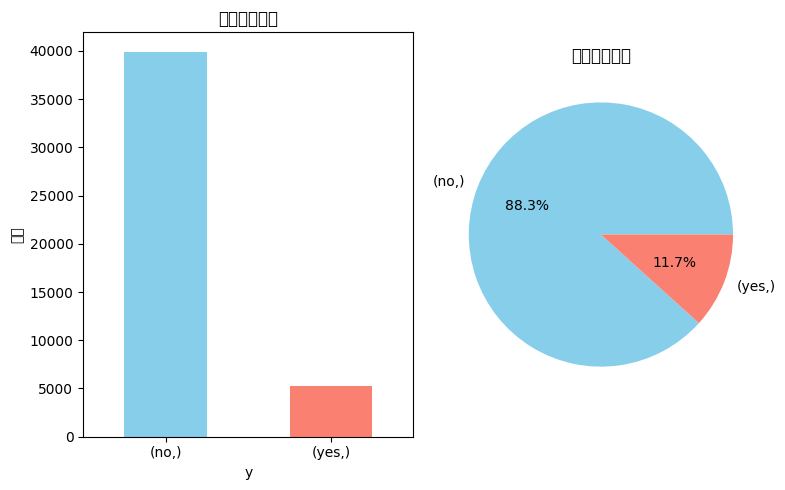

In [ ]:
# 合併特徵和目標變數，方便分析
df = pd.concat([X, y], axis=1)

# 查看資料集的詳細資訊
print("=== 資料集基本資訊 ===")
print(f"資料筆數: {len(df)}")
print(f"特徵數量: {len(X.columns)}")
print(f"缺失值總數: {df.isnull().sum().sum()}")

# 查看目標變數的分佈（檢查是否有資料不平衡問題）
print("\n=== 目標變數分佈 ===")
target_counts = y.value_counts()
print(target_counts)
print(f"資料不平衡比例: {target_counts.min()/target_counts.max():.3f}")

# 視覺化目標變數分佈
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('目標變數分佈')
plt.ylabel('數量')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('目標變數比例')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# 處理類別型變數（將文字轉換為數字）
print("=== 處理類別型變數 ===")

# 建立編碼器字典，用來記住每個變數的編碼方式
label_encoders = {}

# 複製資料避免修改原始資料
X_processed = X.copy()

# 對每個類別型變數進行編碼
for column in X_processed.columns:
    if X_processed[column].dtype == 'object':  # 如果是文字類型
        print(f"編碼變數: {column}")
        le = LabelEncoder()
        X_processed[column] = le.fit_transform(X_processed[column])
        label_encoders[column] = le  # 記住編碼方式，之後可能會用到

# 處理目標變數
y_processed = LabelEncoder().fit_transform(y.values.ravel())

print(f"\n處理後的資料形狀: {X_processed.shape}")
print("前5筆處理後的資料:")
print(X_processed.head())

=== 處理類別型變數 ===
編碼變數: job
編碼變數: marital
編碼變數: education
編碼變數: default
編碼變數: housing
編碼變數: loan
編碼變數: contact
編碼變數: month
編碼變數: poutcome

處理後的資料形狀: (45211, 16)
前5筆處理後的資料:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  
0            5      8       261         1     -1         0         3  
1            5      8       151         1     -1         0         3  
2            5      8        76         1     -1         0         3  
3            5      8        92         1     -1         0         3  
4           

In [ ]:
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed,
    test_size=0.2,      # 20%的資料用來測試
    random_state=42,    # 設定隨機種子，確保結果可以重現
    stratify=y_processed  # 保持目標變數的比例
)

print(f"訓練集大小: {X_train.shape}")
print(f"測試集大小: {X_test.shape}")

# 資料標準化（讓所有特徵都在相似的範圍內）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 計算平均值和標準差，然後標準化
X_test_scaled = scaler.transform(X_test)        # 使用相同的平均值和標準差標準化測試集

print("\n標準化完成!")
print(f"標準化後訓練集的平均值: {X_train_scaled.mean():.6f}")
print(f"標準化後訓練集的標準差: {X_train_scaled.std():.6f}")

訓練集大小: (36168, 16)
測試集大小: (9043, 16)

標準化完成!
標準化後訓練集的平均值: 0.000000
標準化後訓練集的標準差: 1.000000


=== 處理前的類別分佈 ===
類別 0: 31937 筆 (88.3%)
類別 1: 4231 筆 (11.7%)

=== 處理後的類別分佈 ===
類別 0: 31937 筆 (50.0%)
類別 1: 31937 筆 (50.0%)

原始訓練集大小: (36168, 16)
平衡後訓練集大小: (63874, 16)


/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 31558 (\N{CJK UNIFIED IDEOGRAPH-7B46}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 34913 (\N{CJK UNIFIED IDEOGRAPH-8861}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1901546683.py:34: UserWarning: Glyph 34389 (\N{CJK UNIFIED IDEOGRAPH-8655}) missi

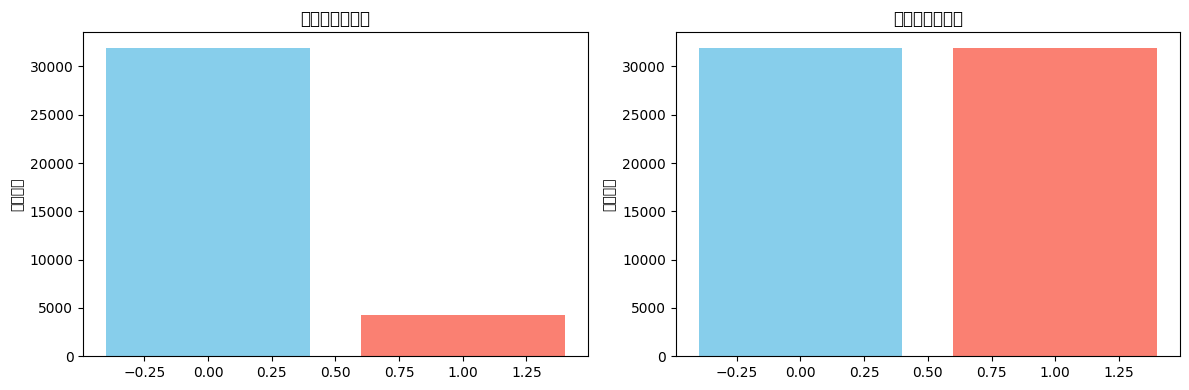

In [ ]:
# 檢查資料不平衡狀況
print("=== 處理前的類別分佈 ===")
unique, counts = np.unique(y_train, return_counts=True)
for i in range(len(unique)):
    print(f"類別 {unique[i]}: {counts[i]} 筆 ({counts[i]/len(y_train)*100:.1f}%)")

# 使用SMOTE進行過採樣（增加少數類別的資料）
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\n=== 處理後的類別分佈 ===")
unique, counts = np.unique(y_train_balanced, return_counts=True)
for i in range(len(unique)):
    print(f"類別 {unique[i]}: {counts[i]} 筆 ({counts[i]/len(y_train_balanced)*100:.1f}%)")

print(f"\n原始訓練集大小: {X_train_scaled.shape}")
print(f"平衡後訓練集大小: {X_train_balanced.shape}")

# 視覺化資料平衡前後的差異
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 處理前
unique_before, counts_before = np.unique(y_train, return_counts=True)
ax1.bar(unique_before, counts_before, color=['skyblue', 'salmon'])
ax1.set_title('資料平衡處理前')
ax1.set_ylabel('資料筆數')

# 處理後
unique_after, counts_after = np.unique(y_train_balanced, return_counts=True)
ax2.bar(unique_after, counts_after, color=['skyblue', 'salmon'])
ax2.set_title('資料平衡處理後')
ax2.set_ylabel('資料筆數')

plt.tight_layout()
plt.show()

In [ ]:
# 設定可調整的模型參數
print("=== 模型參數設定 ===")

# ========== 可調整參數區域 ==========
HIDDEN_LAYER_1 = 128        # 第一層神經元數量
HIDDEN_LAYER_2 = 64         # 第二層神經元數量
DROPOUT_RATE = 0.3          # Dropout比例（防止過度配適）
LEARNING_RATE = 0.01        # 學習率
BATCH_SIZE = 32             # 批次大小
EPOCHS = 100                # 訓練回合數
# =====================================

print(f"第一隱藏層神經元: {HIDDEN_LAYER_1}")
print(f"第二隱藏層神經元: {HIDDEN_LAYER_2}")
print(f"Dropout比例: {DROPOUT_RATE}")
print(f"學習率: {LEARNING_RATE}")
print(f"批次大小: {BATCH_SIZE}")
print(f"訓練回合數: {EPOCHS}")

# 建立DNN模型
model = Sequential([
    # 輸入層到第一隱藏層
    Dense(HIDDEN_LAYER_1,
          input_dim=X_train_balanced.shape[1],  # 輸入特徵數量
          activation='relu',                     # ReLU啟動函數
          name='hidden_layer_1'),

    # 第一個Dropout層（防止過度配適）
    Dropout(DROPOUT_RATE, name='dropout_1'),

    # 第二隱藏層
    Dense(HIDDEN_LAYER_2,
          activation='relu',
          name='hidden_layer_2'),

    # 第二個Dropout層
    Dropout(DROPOUT_RATE, name='dropout_2'),

    # 輸出層（二元分類，所以只有1個神經元）
    Dense(1,
          activation='sigmoid',  # Sigmoid函數輸出0-1之間的機率
          name='output_layer')
])

# 模型摘要
print("\n=== 模型架構 ===")
model.summary()

=== 模型參數設定 ===
第一隱藏層神經元: 128
第二隱藏層神經元: 64
Dropout比例: 0.3
學習率: 0.01
批次大小: 32
訓練回合數: 100

=== 模型架構 ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 編譯模型（設定優化器、損失函數和評估指標）
model.compile(
    optimizer=SGD(learning_rate=LEARNING_RATE),  # 使用SGD優化器
    loss='binary_crossentropy',                   # 二元分類損失函數
    metrics=['accuracy']                          # 評估指標
)

print("模型編譯完成！")

# 訓練模型
print("\n開始訓練模型...")
history = model.fit(
    X_train_balanced, y_train_balanced,  # 訓練資料
    batch_size=BATCH_SIZE,               # 批次大小
    epochs=EPOCHS,                       # 訓練回合數
    validation_data=(X_test_scaled, y_test),  # 驗證資料
    verbose=1                            # 顯示訓練過程
)

print("\n模型訓練完成！")

模型編譯完成！

開始訓練模型...
Epoch 1/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7232 - loss: 0.5518 - val_accuracy: 0.8116 - val_loss: 0.4114
Epoch 2/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8084 - loss: 0.4342 - val_accuracy: 0.7895 - val_loss: 0.4263
Epoch 3/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8195 - loss: 0.4155 - val_accuracy: 0.7881 - val_loss: 0.4198
Epoch 4/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.4047 - val_accuracy: 0.7763 - val_loss: 0.4409
Epoch 5/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8273 - loss: 0.3994 - val_accuracy: 0.7878 - val_loss: 0.4123
Epoch 6/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8250 - loss: 0.3988 - val_accuracy: 0.7896 - val_loss: 0.4078
Epoch 7/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8281 - loss: 0.3933 - val_accuracy: 0.7939 - val_loss: 0.4007
Epoch 8/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accura

/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2688404839.py:22: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missi

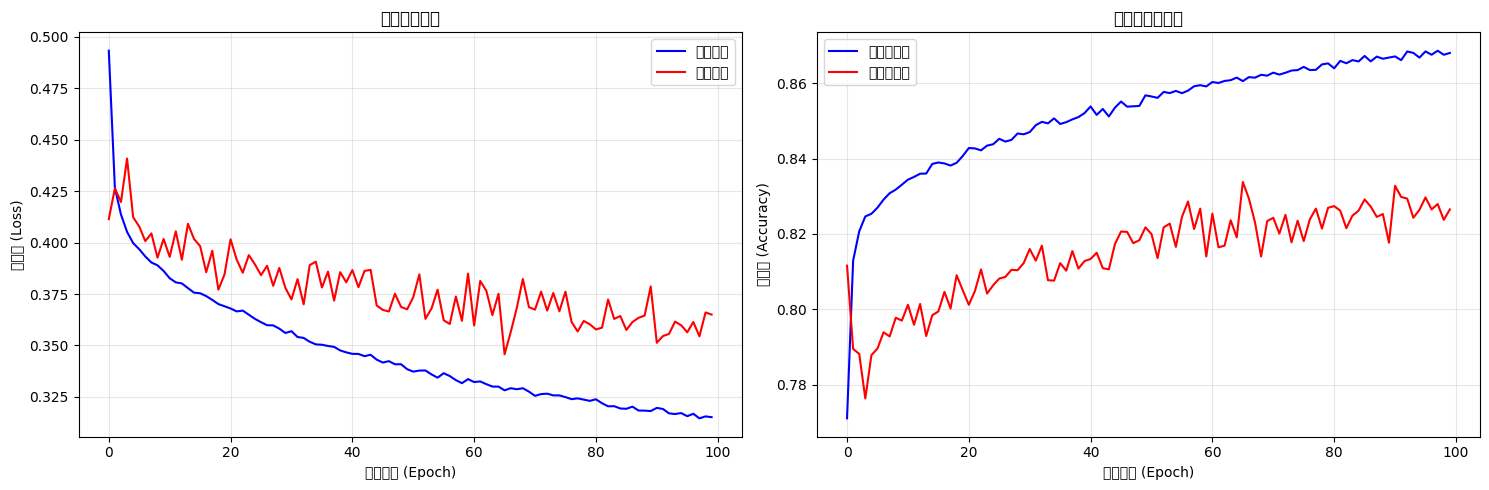

=== 最終訓練結果 ===
最終訓練準確率: 0.8681
最終驗證準確率: 0.8265
最終訓練損失: 0.3151
最終驗證損失: 0.3650

✅ 模型表現良好，沒有明顯的過度配適問題


In [ ]:
# 繪製訓練過程中的損失和準確率變化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 繪製損失曲線
ax1.plot(history.history['loss'], label='訓練損失', color='blue')
ax1.plot(history.history['val_loss'], label='驗證損失', color='red')
ax1.set_title('模型損失變化')
ax1.set_xlabel('訓練回合 (Epoch)')
ax1.set_ylabel('損失值 (Loss)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 繪製準確率曲線
ax2.plot(history.history['accuracy'], label='訓練準確率', color='blue')
ax2.plot(history.history['val_accuracy'], label='驗證準確率', color='red')
ax2.set_title('模型準確率變化')
ax2.set_xlabel('訓練回合 (Epoch)')
ax2.set_ylabel('準確率 (Accuracy)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 分析訓練結果
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("=== 最終訓練結果 ===")
print(f"最終訓練準確率: {final_train_acc:.4f}")
print(f"最終驗證準確率: {final_val_acc:.4f}")
print(f"最終訓練損失: {final_train_loss:.4f}")
print(f"最終驗證損失: {final_val_loss:.4f}")

# 檢查是否有過度配適
if final_train_acc - final_val_acc > 0.1:
    print("\n⚠️  警告: 可能存在過度配適問題!")
    print("建議: 增加Dropout比例或減少模型複雜度")
elif abs(final_train_acc - final_val_acc) < 0.05:
    print("\n✅ 模型表現良好，沒有明顯的過度配適問題")
else:
    print("\n📊 模型表現可接受")

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== 模型評估結果 ===
測試集準確率: 0.8265

=== 詳細分類報告 ===
              precision    recall  f1-score   support

        不會申請       0.98      0.82      0.89      7985
         會申請       0.39      0.85      0.53      1058

    accuracy                           0.83      9043
   macro avg       0.68      0.84      0.71      9043
weighted avg       0.91      0.83      0.85      9043



/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26371 (\N{CJK UNIFIED IDEOGRAPH-6703}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30003 (\N{CJK UNIFIED IDEOGRAPH-7533}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35531 (\N{CJK UNIFIED IDEOGRAPH-8ACB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-521450254.py:53: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:53: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipyth

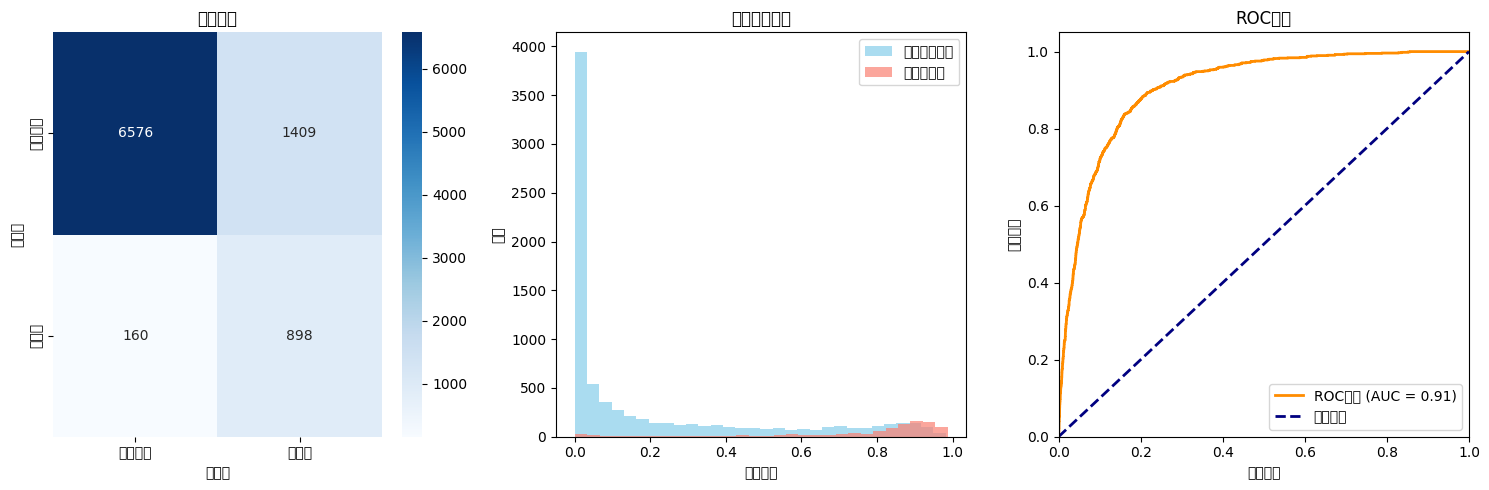


=== 特徵重要性分析 ===
前10個最重要的特徵:
        feature  importance
11     duration    0.178344
13        pdays    0.155328
10        month    0.142100
8       contact    0.140727
15     poutcome    0.132133
14     previous    0.124044
5       balance    0.104606
12     campaign    0.102804
6       housing    0.095610
9   day_of_week    0.094511


/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-521450254.py:78: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from

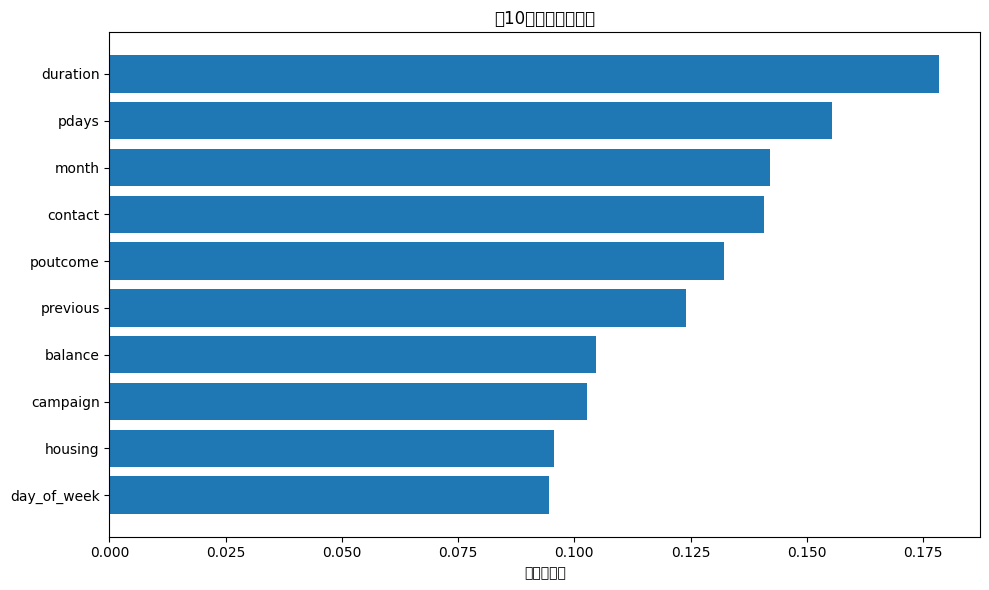

In [ ]:
# 對測試集進行預測
y_pred_prob = model.predict(X_test_scaled)  # 預測機率
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # 轉換為0或1的預測結果

# 計算各種評估指標
accuracy = accuracy_score(y_test, y_pred)
print("=== 模型評估結果 ===")
print(f"測試集準確率: {accuracy:.4f}")

# 詳細的分類報告
print("\n=== 詳細分類報告 ===")
print(classification_report(y_test, y_pred,
                          target_names=['不會申請', '會申請']))

# 混淆矩陣視覺化
plt.figure(figsize=(15, 5))

# 混淆矩陣
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['不會申請', '會申請'],
            yticklabels=['不會申請', '會申請'])
plt.title('混淆矩陣')
plt.ylabel('實際值')
plt.xlabel('預測值')

# 預測機率分佈
plt.subplot(1, 3, 2)
plt.hist(y_pred_prob[y_test==0], bins=30, alpha=0.7, label='實際不會申請', color='skyblue')
plt.hist(y_pred_prob[y_test==1], bins=30, alpha=0.7, label='實際會申請', color='salmon')
plt.xlabel('預測機率')
plt.ylabel('頻次')
plt.title('預測機率分佈')
plt.legend()

# ROC曲線
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC曲線 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='隨機猜測')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽陽性率')
plt.ylabel('真陽性率')
plt.title('ROC曲線')
plt.legend()

plt.tight_layout()
plt.show()

# 特徵重要性分析（透過權重大小）
print("\n=== 特徵重要性分析 ===")
weights = np.abs(model.layers[0].get_weights()[0])  # 取得第一層的權重
feature_importance = np.mean(weights, axis=1)       # 計算每個特徵的平均權重

# 建立特徵重要性DataFrame
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("前10個最重要的特徵:")
print(importance_df.head(10))

# 視覺化前10個重要特徵
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('特徵重要性')
plt.title('前10個最重要的特徵')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()